# Introduction of Time Series with Pandas
- The majority of our data will be in the form of a time series, with a DataTime index and some corresponding value.
- Will learn how to use pandas' special time series features to work with this sort of data.

## Sections will be covered
- DataTime index
- Time Resampling
- Time Shifts
- Rolling and Expanding

# DataTime index
- Often the time and data information won't just be in a separate column, but instead be the actuall index!
- Let's discover the built in pandastools for creating and working with a DataTime index.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from datetime import datetime

In [6]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 1

In [12]:
my_date = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [13]:
my_date

datetime.datetime(2017, 1, 2, 13, 30, 1)

In [14]:
type(my_date)

datetime.datetime

In [15]:
my_date.day

2

In [16]:
my_date.month

1

In [17]:
first_two = [datetime(2016, 1,1), datetime(2016, 1, 2)]

In [18]:
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [19]:
type(first_two)

list

In [23]:
dt_ind = pd.DatetimeIndex(first_two) # Convert to Pandas Datetime index

In [24]:
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [26]:
data = np.random.randn(2,2 )

In [27]:
data

array([[ 0.70312458, -0.91391985],
       [ 0.10145981, -1.11029636]])

In [28]:
cols = ['a', 'b']

In [29]:
df = pd.DataFrame(data, dt_ind, cols)

In [30]:
df

,a,b
2016-01-01,0.703125,-0.913920
2016-01-02,0.101460,-1.110296


In [32]:
df.index.argmax()

1

In [34]:
df.index.min()

Timestamp('2016-01-01 00:00:00')

# Time resampling
- We will usually get data that has a DataTime index on a smaller time scale (every day, every hour, etc...)
- However, it is often a good idea to aggregate the data based off some frequency (monthly, quarterly, etc...)
- We will use a stock market data set of Walmart prices.

In [35]:
df = pd.read_csv('walmart_stock.csv') # index_col='Date', parse_dates = True

In [36]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [38]:
# pre-process -- convert Object-String to DateTime type
# Note: the date column should be in some datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [40]:
df.set_index('Date', inplace=True)

In [41]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


## Small summary to convert datetime index
1. Parse to Datetime index when importing data
```
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates = True)
```

2. Convert to Datetime manually
```
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
```

# Time Resampling (cont)

A common operation with time series data is resamplling based on the time series index. Let see how to use the resample() method.

#### All possible time series offest strings

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [45]:
df.resample(rule='BQ').mean() # Group by rule of A, and aggregate by mean

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


### Custom aggregation of resampling with self-define function or lambda

In [46]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [47]:
def first_day(entry):
    return entry[0]

In [48]:
df.resample(rule='A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


## Visualization of resampling

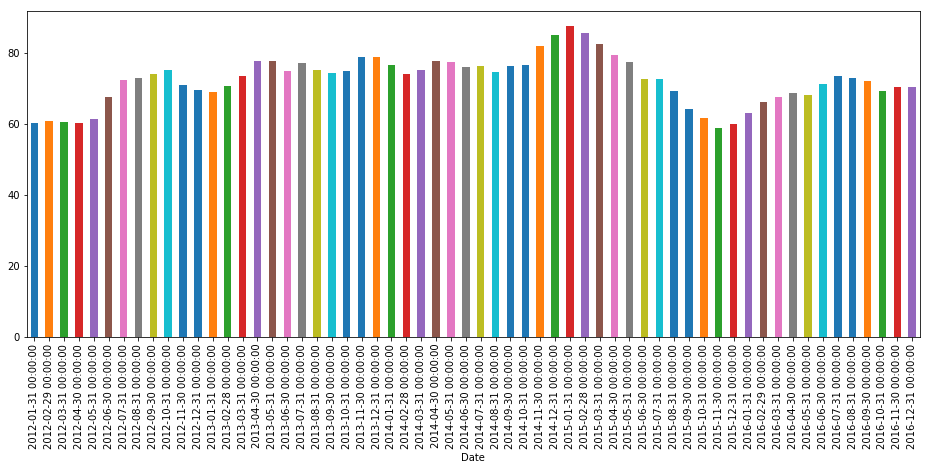

In [51]:
df['Close'].resample('M').mean().plot(kind='bar', figsize=(16, 6))

# Time Shifting
- Certain models will require us to shift our data forward or backward a certain amount of time steps.

In [52]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [53]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [54]:
df.shift(periods = 1).head() # forward periods is positive, backward is negative

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


## T shift and frequency 
This is assign all data to a specific index with the frequency provided without do any aggregation.

In [55]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [56]:
df.tshift(freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


# Pandas rolling and expanding
- We can use pandas' built-in rolling methods to create things like a rolling mean based off a given time period.

- Often daily financial data can be a bit noisy. 
- We can use the rolling mean (often called Moving Average) to get more signal about the general trend of the data.
- You will provide a window of a set time period and then use that to calculate your aggregate statistic (such as the mean).

In [57]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


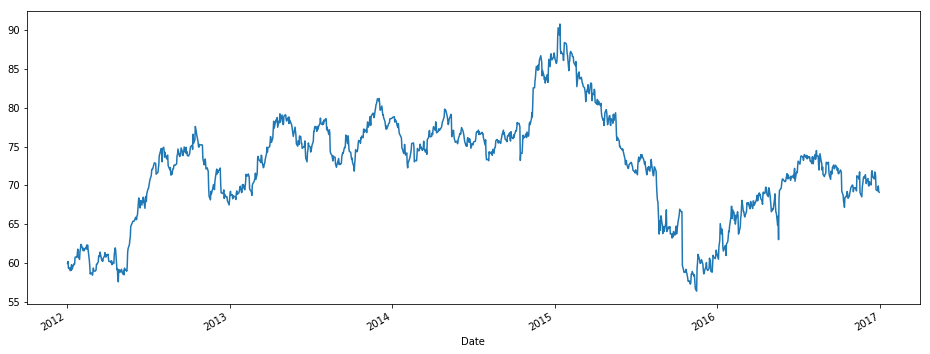

In [58]:
df['Open'].plot(figsize=(16,6))

In [61]:
df.rolling(window = 7).mean().head(14)  # we mainly focus on the window of MA

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


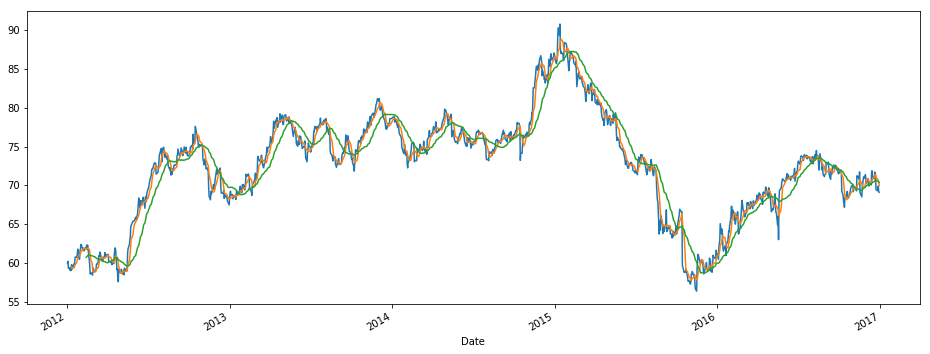

In [67]:
# See the diff of original and MA chart
df['Open'].plot()
df['Open'].rolling(window = 7).mean().plot()
df['Open'].rolling(window = 30).mean().plot(figsize=(16, 6))

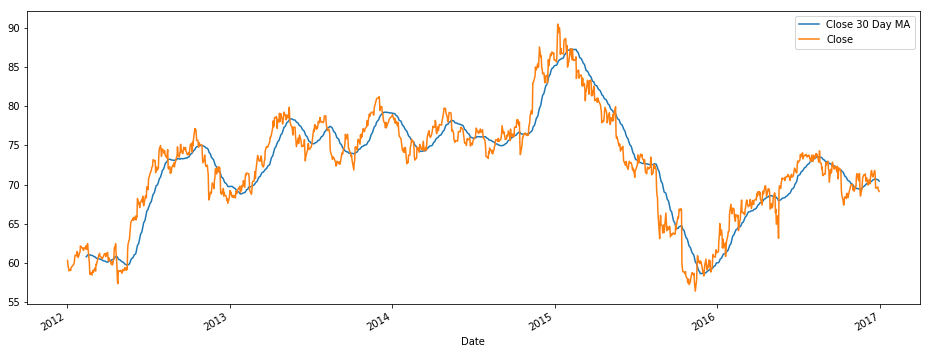

In [70]:
# Pandas will automatically make a legend for you
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day MA', 'Close']].plot(figsize=(16,6))

### Expanding
- Expanding considers all data before the current time and pass to aggregate function.
- It may not a good way to reflect the movements of the time series since during the expanding periods it may have big up and down movements and it will be cancelled out to the current time aggregation.

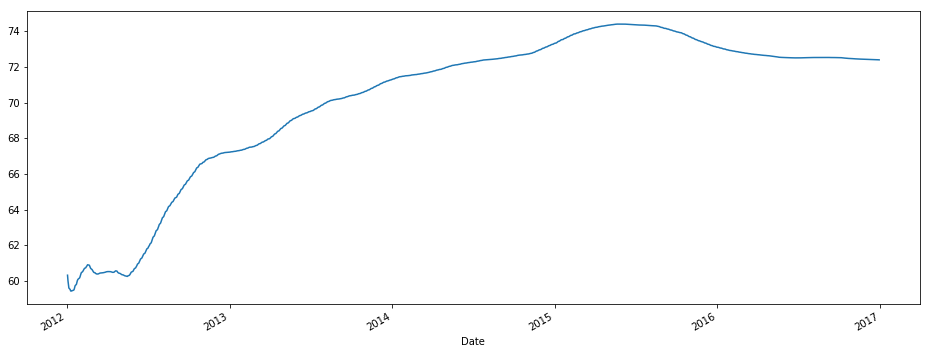

In [72]:
df['Close'].expanding().mean().plot(figsize=(16,6))

# Bollinger Bands

<img src="BollingerBands.png">

This is a typical Bollinger Band. 

- They are volatility bands placed above and below a moving average where the volatility is based on the standard deviation which changes as volatility increases or decreases.
- The bands will automatically widen when volatility increases and narrow when volatility decreases.
- The dynamic nature of Bollinger Bands also means that they can be used on different securities with the standard setting, so you can use them on a variety of securities or stocks.
- For signals, Bollinger Bands can be used to identify tops and bottoms or the actual trend.

## Explain on the chart
- The blue line is the original closing price.
- The orange line is the 20 Day mean -- typically Bollinger Bands uses a 20-day period as their moving average. But other analysis technicques can increase those actual moving average windows.
- Top green line is the upper band and red line is the lower band.
- You can see that there is a jump in the expansion indicating that there is a lot more volatility for that time period. Based off your quantitative trading algorithm, you may want to trade more when it's more volatile or you may want to close that position if it's too volatile for you.
- Basically, people can use these bands to determine whether a price movement is significant or not.
- Technically, prices are relatively high when they're actually above the upper band, and vice versa. 
- This is not just a kind of straight indicator of whether you should buy or sell. Relatively high price should not be regarded as bearish or as a sell signal and low price should not be considered bullish or as a buy signal.
- Bollinger bands are **not meant to be used as a standalone tool** to your trade off.

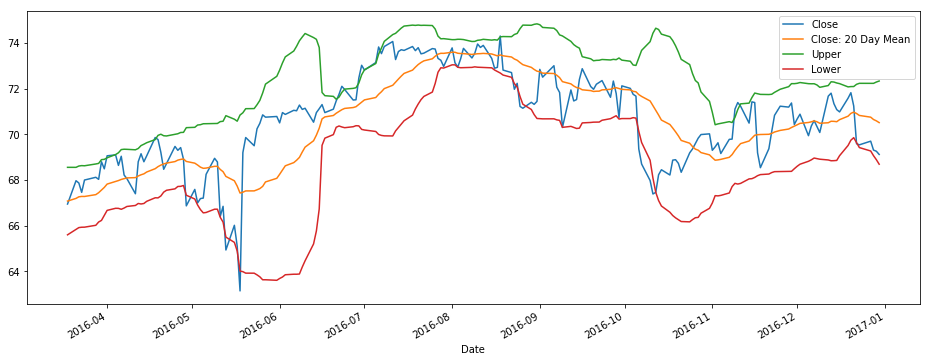

In [74]:
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()


# Upper = 20MA + 2 * std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2 * (df['Close'].rolling(20).std())


# Lower = 20MA - 2 * std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2 * (df['Close'].rolling(20).std())


# Close
df[['Close', 'Close: 20 Day Mean', 'Upper', 'Lower']].tail(200).plot(figsize=(16, 6))